#### Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# load the data

data = pd.read_csv("insurance.csv")

In [3]:
# display first rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# displays the last 5 rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## statistical analysis

#### Statistical analysis is the collection and interpretation of data in order to uncover patterns and trends. It is a component of data analytics. Statistical analysis can be used in situations like gathering research interpretations, statistical modeling or designing surveys and studies.

In [4]:
# used to display the basic statistics on the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [6]:
data.mean()

C:\Users\SmartbridgePC\anaconda4\envs\abc\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [7]:
data.median()

C:\Users\SMARTB~1\AppData\Local\Temp/ipykernel_8228/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [8]:
data.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [9]:
data.std()

C:\Users\SMARTB~1\AppData\Local\Temp/ipykernel_8228/2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Data visualization

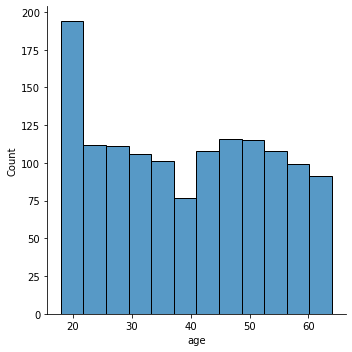

In [12]:
sns.displot(data['age'])

C:\Users\SmartbridgePC\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


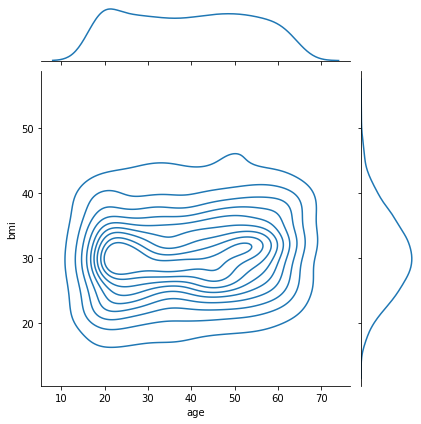

In [14]:
sns.jointplot(data['age'],data['bmi'],kind="kde")

C:\Users\SmartbridgePC\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

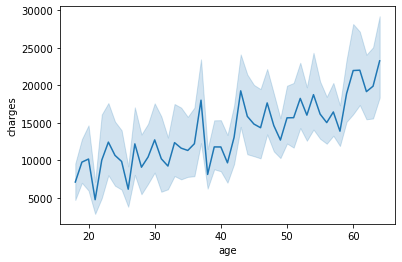

In [15]:
sns.lineplot(data['age'],data['charges'])

In [16]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
data['age'].fillna(data['age'].mean(),inplace=True)

C:\Users\SmartbridgePC\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

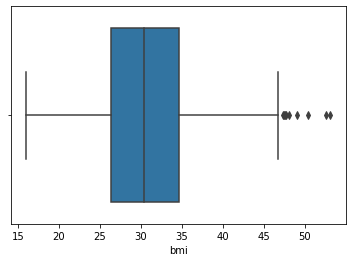

In [19]:
sns.boxplot(data['bmi'])

#### method to outlier detection

In [20]:
qnt = data.quantile(q =(0.25,0.75))
qnt

,age,bmi,children,charges
0.25,27.0,26.29625,0.0,4740.287150
0.75,51.0,34.69375,2.0,16639.912515


upperexterme = q3 + 1.5*IQR

lowerexterme = q1 - 1.5*IQR

IQR = q3-q1

In [21]:
iqr = qnt.loc[0.75]-qnt.loc[0.25]

In [22]:
iqr

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [23]:
lower = qnt.loc[0.25]-1.5*iqr
lower

age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64

In [24]:
upper = qnt.loc[0.75]+1.5*iqr
upper

age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64

In [25]:
data.mean()

C:\Users\SMARTB~1\AppData\Local\Temp/ipykernel_8228/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

#### replacing outlier

In [34]:
data['age'] = np.where(data['age']>87,40,data['age'])
data['bmi'] = np.where(data['bmi']>45,31,data['bmi'])

C:\Users\SmartbridgePC\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

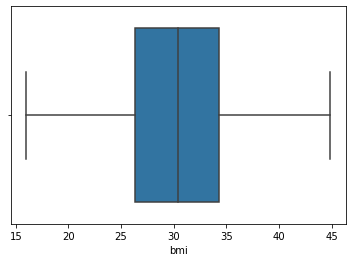

In [35]:
sns.boxplot(data['bmi'])

#### encoding

In [39]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [38]:
data['sex'].replace({"female":0,"male":1},inplace=True)
data['smoker'].replace({"yes":1,"no":0},inplace=True)

In [40]:
data_main = pd.get_dummies(data,columns=['region'])

In [41]:
data_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


##### sepearting x and y values

In [47]:
y = data_main['charges']

In [45]:
x= data_main.drop(columns=['charges'],axis=1)

In [46]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## scaling

In [48]:
names = x.columns

In [49]:
names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [50]:
from sklearn.preprocessing import scale

In [51]:
x = scale(x)

In [52]:
x

array([[-1.43876426, -1.0105187 , -0.43913621, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.58631926, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.45180466, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.12437766, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.80599421, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.23474389, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [53]:
x = pd.DataFrame(x,columns=names)

In [54]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-1.010519,-0.439136,-0.908614,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.586319,-0.078767,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.451805,1.580926,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.346673,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.267936,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
x_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
621,-0.157143,0.989591,0.643968,2.410772,1.970587,-0.565267,-0.566418,-0.611324,1.765481
194,-1.509965,0.989591,0.701617,-0.908614,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
240,-1.153959,-1.010519,1.092933,0.751079,1.970587,1.769076,-0.566418,-0.611324,-0.566418
1168,-0.513149,0.989591,0.836132,0.751079,-0.507463,-0.565267,-0.566418,-0.611324,1.765481
1192,1.338082,-1.010519,0.346115,-0.078767,-0.507463,1.769076,-0.566418,-0.611324,-0.566418


In [58]:
x_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
578,0.910875,0.989591,-0.037339,-0.078767,-0.507463,-0.565267,-0.566418,-0.611324,1.765481
610,0.554869,-1.010519,-0.182336,-0.078767,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
569,0.626070,0.989591,1.773367,0.751079,1.970587,-0.565267,1.765481,-0.611324,-0.566418
1034,1.551686,0.989591,1.391660,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
198,0.839674,-1.010519,-2.159875,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [59]:
y_train,y_test

(621     40182.24600
 194      1137.46970
 240     38511.62830
 1168     4670.64000
 1192    13019.16105
            ...     
 763      3070.80870
 835      7160.33030
 1216     5415.66120
 559      1646.42970
 684      4766.02200
 Name: charges, Length: 1070, dtype: float64,
 578      9724.53000
 610      8547.69130
 569     45702.02235
 1034    12950.07120
 198      9644.25250
            ...     
 1084    15019.76005
 726      6664.68595
 1132    20709.02034
 725     40932.42950
 963      9500.57305
 Name: charges, Length: 268, dtype: float64)